In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, uuid

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [30]:
dataset = pd.read_parquet("../data/processed/dataset.parquet")

In [31]:
# on remplace les identifiants nuls par un identifiant aléatoire
dataset["identifiant_usager"] = dataset["identifiant_usager"].apply(lambda row: row if row is not None else int(str(hash(uuid.uuid4()))[:9]))

In [33]:
# on enlève les doublons (environ 39k)
dataset = dataset.drop_duplicates(subset=["identifiant_usager"])

In [7]:
dataset.describe()

,jour_accident,mois_accident,annee_accident,conditions_lumieres,localisation,type_intersection,conditions_atmospheriques,type_collision,categorie_route,indice_route,...,categorie_usager,gravite_blessure,sexe_usager,annee_naissance,motif_deplacement,equipement_securite_1,equipement_securite_2,equipement_securite_3,localisation_pieton,etat_pieton
count,488934.000000,488934.000000,488934.000000,488934.000000,488934.000000,488934.000000,488934.000000,488934.000000,488934.000000,488934.000000,...,486978.000000,486978.000000,486978.000000,478439.000000,486978.000000,486978.000000,486978.000000,486978.000000,486978.000000,486978.000000
mean,15.599799,6.745413,2021.554602,1.906421,1.617284,2.068216,1.609816,3.718983,3.287755,-0.179296,...,1.329588,2.524198,1.276764,1983.152258,3.185347,1.878239,0.973258,-0.908579,-0.223700,-0.826807
std,8.749112,3.355764,1.095531,1.476384,0.486050,1.999158,1.676822,1.900646,1.273061,0.400626,...,0.610149,1.378151,0.549230,18.915494,2.771271,2.291530,3.038360,0.917200,1.226318,0.621654
min,1.000000,1.000000,2020.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,1.000000,-1.000000,-1.000000,1900.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,4.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,16.000000,7.000000,2022.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,0.000000,...,1.000000,3.000000,1.000000,1987.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,23.000000,10.000000,2023.000000,3.000000,2.000000,2.000000,1.000000,6.000000,4.000000,0.000000,...,2.000000,4.000000,2.000000,1998.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,31.000000,12.000000,2023.000000,5.000000,2.000000,9.000000,9.000000,7.000000,9.000000,3.000000,...,3.000000,4.000000,2.000000,2023.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [34]:
# valeurs manquantes
dataset.isna().mean()*100

numero_accident               0.000000
jour_accident                 0.000000
mois_accident                 0.000000
annee_accident                0.000000
heure_accident                0.000000
conditions_lumieres           0.000000
departement                   0.000000
commune                       0.000000
localisation                  0.000000
type_intersection             0.000000
conditions_atmospheriques     0.000000
type_collision                0.000000
adresse                       1.710886
latitude                      0.000000
longitude                     0.000000
categorie_route               0.000000
numero_route                 11.668998
indice_route                  0.000000
lettre_route                 91.274584
regime_circulation            0.000000
nombre_voies                  0.000000
presence_voie_reservee        0.000000
profil_route                  0.000000
numero_pr                     0.000000
distance_pr                   0.000000
tracage_route            

In [35]:
#on supprime les colonnes qui ne nous apportent pas d'information
cols_to_drop = ['lettre_route', 'adresse', 'latitude', 'longitude', 'numero_route', 'indice_route', 'lettre_route', 'lartpc','nombre_occupants_tc' ]
dataset = dataset.drop(cols_to_drop, axis=1)

In [36]:
#on supprime les lignes qui ont 'place_occupant' manquant car 6 autres variables sont aussi manquantes dans ces cas et on a que 2k valeurs donc on les oublie
dataset = dataset.dropna(subset=["place_occupant"])

In [37]:
#on remplace les valeurs nulles par -1 car la valeur manquante represente une information 
# (ex: delit de fuite) on choisit -1 pour etre dans les codes du dataset
dataset['annee_naissance'] = dataset['annee_naissance'].fillna(-1)

In [ ]:
#les transports en commun ne seont present que dans 1% des accidents, mais ils donnent potentiellement un info sur la gravité de l'accident
#on décide de drop cette variable plutot que de la completer de 0 (pas de victime de transport en commun)
dataset[dataset['nombre_occupants_tc'].notnull()]['nombre_occupants_tc'].value_counts()

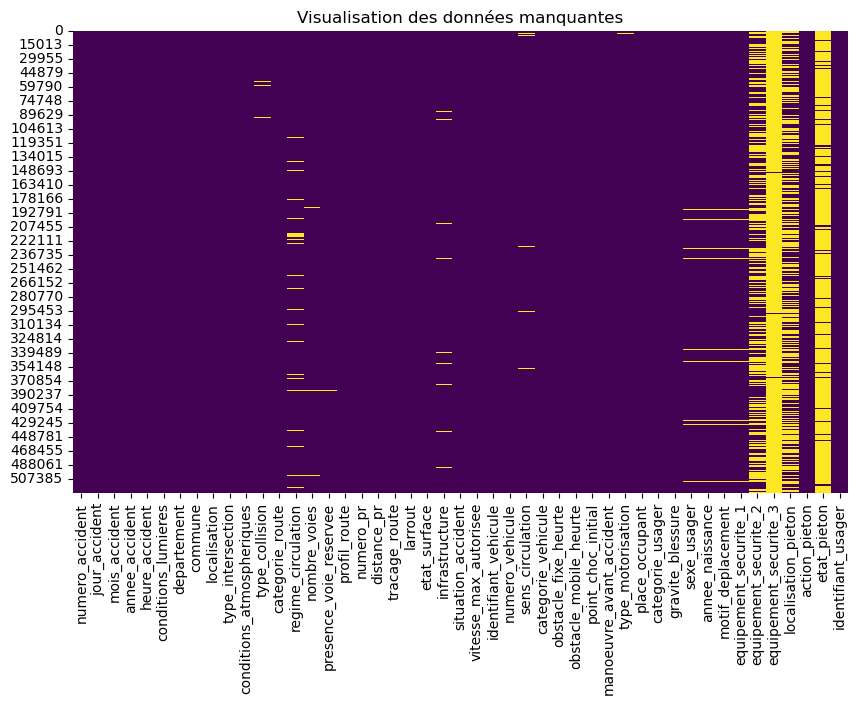

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset == -1, cbar=False, cmap="viridis")
plt.title("Visualisation des données avec -1 pour representer une donnée inconnue")
plt.show()

In [39]:
dataset.isna().mean()*100

numero_accident              0.0
jour_accident                0.0
mois_accident                0.0
annee_accident               0.0
heure_accident               0.0
conditions_lumieres          0.0
departement                  0.0
commune                      0.0
localisation                 0.0
type_intersection            0.0
conditions_atmospheriques    0.0
type_collision               0.0
categorie_route              0.0
regime_circulation           0.0
nombre_voies                 0.0
presence_voie_reservee       0.0
profil_route                 0.0
numero_pr                    0.0
distance_pr                  0.0
tracage_route                0.0
larrout                      0.0
etat_surface                 0.0
infrastructure               0.0
situation_accident           0.0
vitesse_max_autorisee        0.0
identifiant_vehicule         0.0
numero_vehicule              0.0
sens_circulation             0.0
categorie_vehicule           0.0
obstacle_fixe_heurte         0.0
obstacle_m

37 908 doublons sur 526 844 lignes
tous concentrés sur l'année 2023

potentielles features par rapport a un accident (groupby id accident) => nb des gens dans l'accident et nb de victimes

In [62]:
#incoherences
display(dataset.describe())

,jour_accident,mois_accident,annee_accident,conditions_lumieres,localisation,type_intersection,conditions_atmospheriques,type_collision,categorie_route,regime_circulation,nombre_voies,presence_voie_reservee,profil_route,tracage_route,etat_surface,infrastructure,situation_accident,vitesse_max_autorisee,sens_circulation,categorie_vehicule,obstacle_fixe_heurte,obstacle_mobile_heurte,point_choc_initial,manoeuvre_avant_accident,type_motorisation,place_occupant,categorie_usager,gravite_blessure,sexe_usager,annee_naissance,motif_deplacement,equipement_securite_1,equipement_securite_2,equipement_securite_3,localisation_pieton,etat_pieton
count,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000,486843.000000
mean,15.599859,6.744825,2021.560162,1.904098,1.616505,2.066964,1.610410,3.724683,3.286994,1.814702,2.389680,0.203402,1.229435,1.287553,1.255095,0.783168,1.519463,60.135703,1.565796,12.755969,1.132326,1.580275,2.863410,6.976972,1.237826,2.078103,1.329587,2.524210,1.276777,1948.358921,3.185374,1.878230,0.973197,-0.908580,-0.223627,-0.826815
std,8.749052,3.355367,1.093200,1.474514,0.486238,1.998170,1.677682,1.899742,1.273647,0.917659,1.387086,0.671742,0.542543,0.667057,0.789054,2.142178,1.485404,25.948096,0.823717,13.599387,3.264842,1.225882,2.395031,7.994991,1.032162,2.572812,0.610142,1.378135,0.549238,261.104594,2.771265,2.291502,3.038380,0.917213,1.226303,0.621631
min,1.000000,1.000000,2020.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,4.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1969.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,16.000000,7.000000,2022.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1986.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,23.000000,10.000000,2023.000000,3.000000,2.000000,2.000000,1.000000,6.000000,4.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,2.000000,10.000000,0.000000,2.000000,4.000000,15.000000,1.000000,2.000000,2.000000,4.000000,2.000000,1998.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,31.000000,12.000000,2023.000000,5.000000,2.000000,9.000000,9.000000,7.000000,9.000000,4.000000,12.000000,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,901.000000,3.000000,99.000000,17.000000,9.000000,9.000000,26.000000,6.000000,10.000000,3.000000,4.000000,2.000000,2023.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [43]:
#drop the rows that have #VALEURMULTI or #ERREUR in nombre_voies
dataset['nombre_voies'] = dataset['nombre_voies'].str.replace(' ', '')
dataset = dataset[dataset['nombre_voies'] != '#ERREUR']
dataset = dataset[dataset['nombre_voies'] != '#VALEURMULTI']
dataset['nombre_voies'] = dataset['nombre_voies'].astype(int)

In [64]:
#on ne garde que les valeurs de vitesse max autorisée qui sont des multiples de 5 et inférieures à 130 
# (il y avait des valeurs trop petites et trop grandes)
dataset = dataset[(dataset['vitesse_max_autorisee'] % 5 == 0) & (dataset['vitesse_max_autorisee'] <= 130)]

(array([1.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 2.1000e+01, 4.9000e+01,
        2.8100e+02, 4.2200e+02, 8.6500e+02, 2.1380e+03, 1.9860e+03,
        3.6950e+03, 2.6420e+03, 5.0280e+03, 4.1580e+03, 7.7170e+03,
        5.4510e+03, 8.6020e+03, 6.3050e+03, 1.1210e+04, 9.2090e+03,
        1.0378e+04, 1.7447e+04, 1.2119e+04, 1.9627e+04, 1.3828e+04,
        1.9638e+04, 1.3401e+04, 2.2036e+04, 1.5236e+04, 2.4677e+04,
        1.7766e+04, 2.8491e+04, 1.9856e+04, 2.1256e+04, 3.5296e+04,
        2.8124e+04, 3.8936e+04, 1.6266e+04, 1.2650e+04, 4.6450e+03,
        5.3310e+03, 3.1480e+03, 4.4080e+03, 2.4410e+03, 1.4990e+03]),
 array([1900.  , 1902.46, 1904.92, 1907.38, 1909.84, 1912.3 , 1914.76,
        1917.22, 1919.68, 1922.14, 1924.6 , 1927.06, 1929.52, 1931.98,
        1934.44, 1936.9 , 1939.36, 1941.82, 1944.28, 1946.74, 1949.2 ,
        1951.66, 1954.12, 1956.58, 1959.04, 1961.5 , 1963.96, 1966.42,
        1968.88, 1971.34, 1973.8 ,

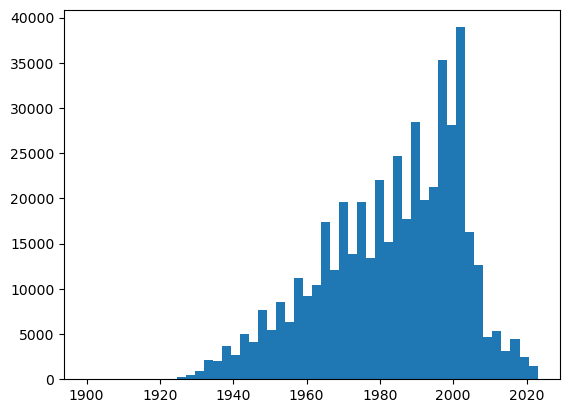

In [57]:
plt.hist(dataset[dataset['annee_naissance'] > 0.0]['annee_naissance'], bins=50)